I. Data Loading and Preprocessing

1. Load the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
nf_data = pd.read_csv('Netflix_Userbase.csv')
print (nf_data.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


2. Handling missing values

In [ ]:
print (nf_data.isnull().sum())

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


3. Encode categorical values

In [ ]:
nf_data_encoded = pd.get_dummies(nf_data)
print (nf_data_encoded.head())
nf_data_dummies = pd.get_dummies(nf_data, drop_first=True)

   User ID  Monthly Revenue  Age  Subscription Type_Basic  \
0        1               10   28                        1   
1        2               15   35                        0   
2        3               12   42                        0   
3        4               12   51                        0   
4        5               10   33                        1   

   Subscription Type_Premium  Subscription Type_Standard  Join Date_01-03-22  \
0                          0                           0                   0   
1                          1                           0                   0   
2                          0                           1                   0   
3                          0                           1                   0   
4                          0                           0                   0   

   Join Date_01-05-23  Join Date_01-06-22  Join Date_01-07-22  ...  \
0                   0                   0                   0  ...   
1           

4. Feature selection

In [ ]:
nf_data_dummies = pd.get_dummies(nf_data, drop_first=True)
nf_data_dummies['revenue'] = (nf_data['Monthly Revenue'] > 0).astype(int)

x_class = nf_data_dummies.drop(['Age', 'Monthly Revenue'], axis=1)
y_class = nf_data_dummies['revenue']

x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class, y_class, test_size=0.2, random_state=42)

II. Explanatory Data Analysis (EDA)

1. Descriptive statistics

In [ ]:
nf_data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


2. Visualizations

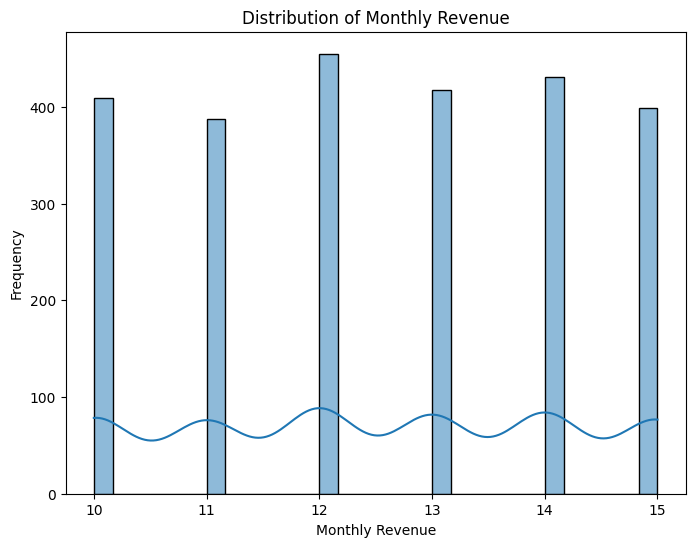

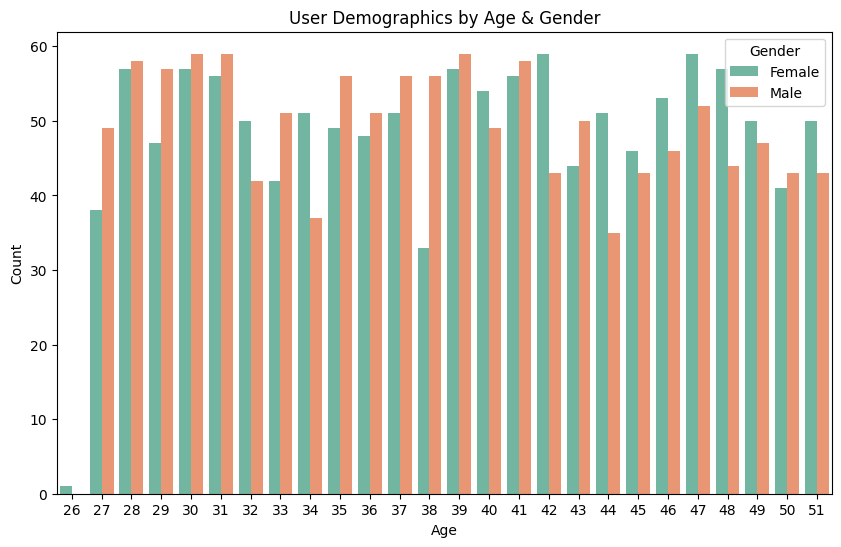

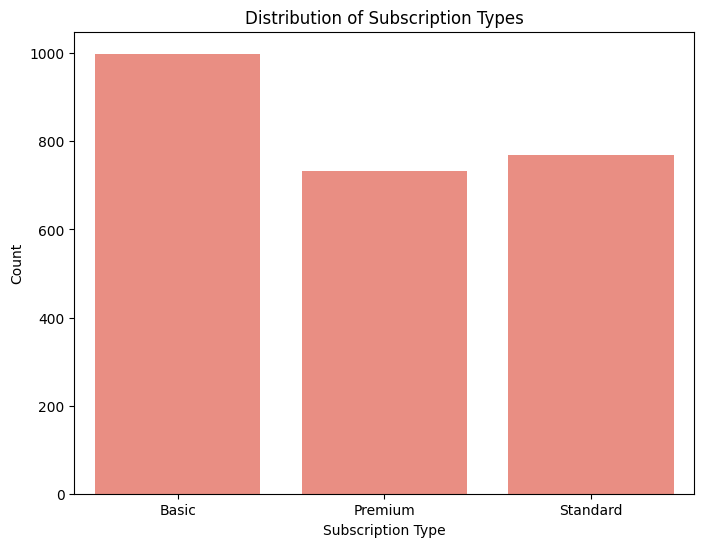

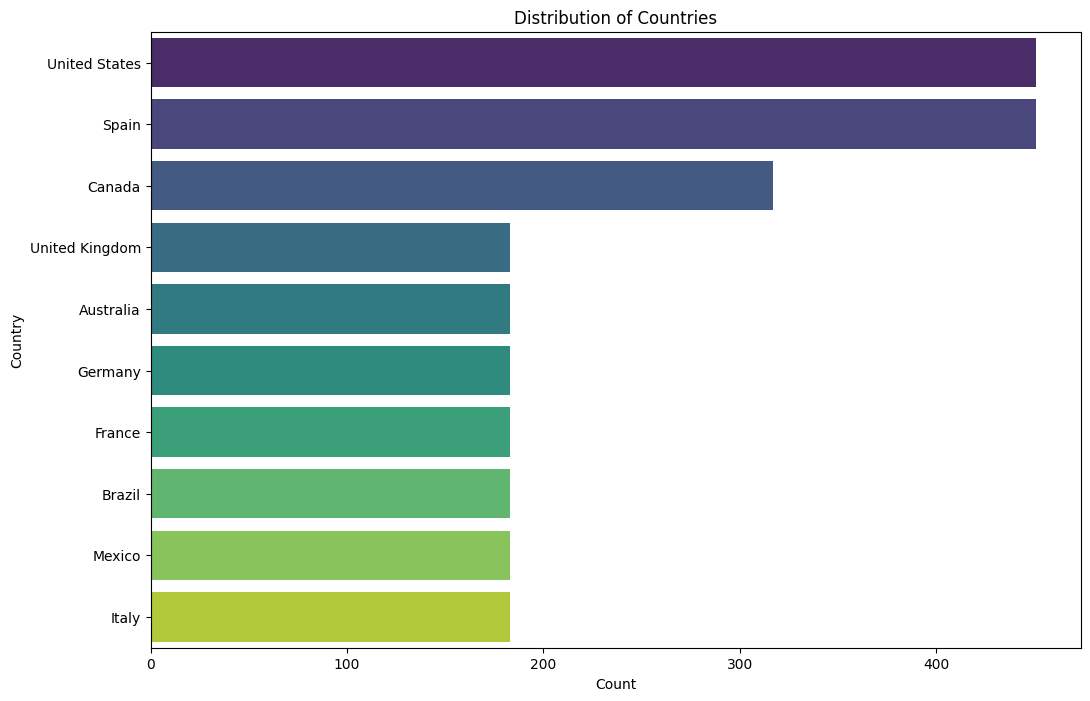

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(nf_data['Monthly Revenue'], bins=30, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='Gender', data=nf_data, palette='Set2')
plt.title('User Demographics by Age & Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='Subscription Type', data=nf_data, color='salmon')
plt.title('Distribution of Subscription Types')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(y='Country', data=nf_data, order=nf_data['Country'].value_counts().index, palette='viridis')
plt.title('Distribution of Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


3. Linear Regression Model (Predicting Monthly Revenue)

1. Build the model

In [ ]:
x = pd.get_dummies(nf_data.drop(columns=['Monthly Revenue']))
y = nf_data['Monthly Revenue']


Slope -0.08989220320414054
Intercept 39.92000763455867


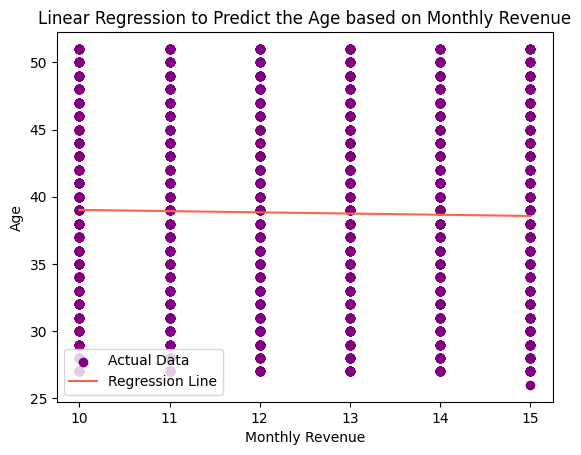

In [ ]:
x = nf_data[['Monthly Revenue']]
y = nf_data['Age']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x,y)

slope = model.coef_[0]
intercept = model.intercept_

print("Slope", slope)
print("Intercept", intercept)

y_pred = model.predict(x_test_scaled)

plt.scatter(x, y, color='purple', label='Actual Data')
plt.plot(x, model.predict(x), color='tomato', label='Regression Line')
plt.xlabel('Monthly Revenue')
plt.ylabel('Age')
plt.title('Linear Regression to Predict the Age based on Monthly Revenue')
plt.legend()
plt.show()


2. Evaluate the model

In [ ]:

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

R-squared: -0.025588326207893086
Root Mean Squared Error: 7.265242264709627


IV. Logistic Regression Model (Predicting Customer Feedback

1. Build the model

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

2. Evaluate the model

In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report")
print(class_report)

Accuracy: 0.036
Confusion Matrix: 
[[ 0  0  0  8  1  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  6  0  0
   0]
 [ 0  0  0 13  4  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  8  0  0
   0]
 [ 0  0  0  9  2  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0  9  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0  9  4  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0  6  5  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  5  0  0
   0]
 [ 0  0  0 10  2  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  4  0  0
   0]
 [ 0  0  0  5  4  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  8  6  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  3  0  0
   0]
 [ 0  0  0 13  4  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  6  0  0
   0]
 [ 0  0  0 11  2  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0 

**5. Comparative Analysis and Evaluation**

***Linear Regression***

1. Feature importance

In [ ]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_[0]})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)
feature_importance.drop(columns=['Abs_Coefficient'], inplace=True)

print(feature_importance)

           Feature  Coefficient
0  Monthly Revenue     0.764456


2. Insights

In [ ]:
revenue_predictions = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': y_pred})
print(revenue_predictions.head())

      Actual Revenue  Predicted Revenue
1447              33                 30
1114              33                 30
1064              33                 30
2287              50                 30
1537              44                 48


***Logistic Regression***

1. Feature importance

In [ ]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_[0]})
feature_importance['Odds Ratio'] = np.exp(feature_importance['Coefficient'])
feature_importance.sort_values(by='Odds Ratio', ascending=False, inplace=True)
print(feature_importance)

           Feature  Coefficient  Odds Ratio
0  Monthly Revenue     0.764456    2.147826


2. Insights

In [ ]:
feedback_predictions = pd.DataFrame({'Actual Feedback': y_test, 'Predicted Feedback': y_pred_binary})
print(feedback_predictions.head())

      Actual Feedback  Predicted Feedback
1447               33                   1
1114               33                   1
1064               33                   1
2287               50                   1
1537               44                   1


Visualization

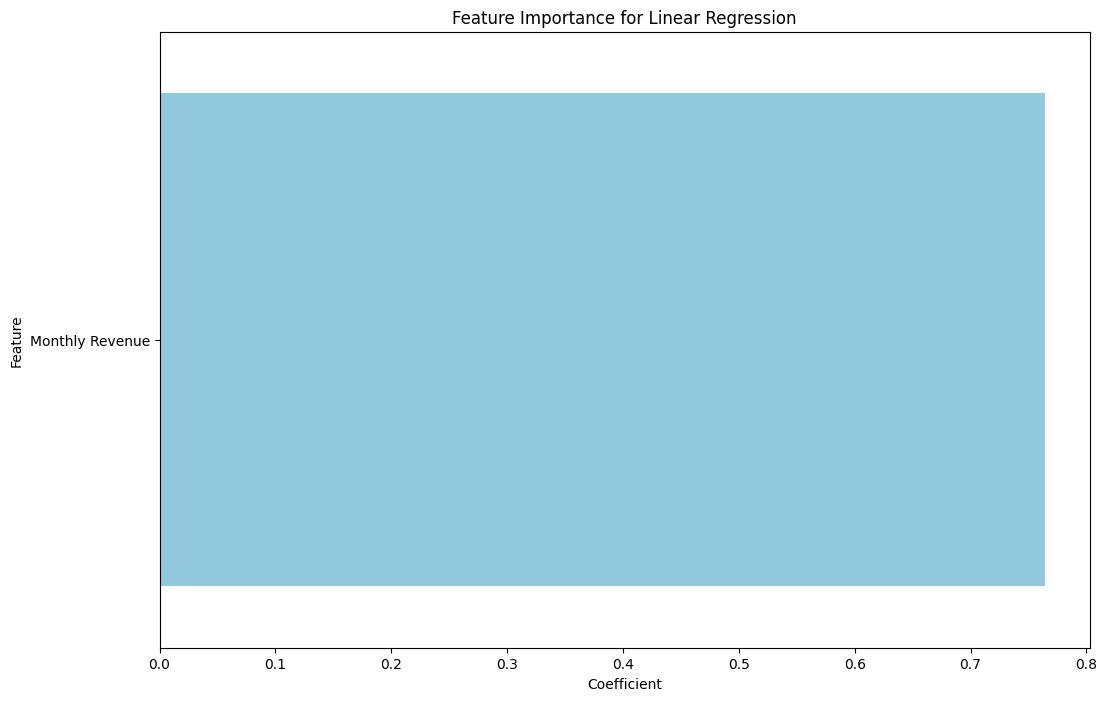

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, color='skyblue')
plt.title('Feature Importance for Linear Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


**EXPLANATION**


**Part 1: Data Preprocessing**

I began by importing the dataset using Pandas, ensuring a structured approach to data handling from the outset. Here, I chose encoding methods that suited the dataset and the models I planned to use. Also in **selection features,** I identified and included the most relevant features to ensure the accuracy and efficiency of the regression models. Here I input Age and Monthly Revenue as variables. I chose this so I can get track of the regression line and get its slope and intercept.



**Part 2: Exploratory Data Analysis (EDA)**
In this particular step, I computed descriptive statistics to gain a comprehensive overview of the dataset. This provided insights into its central tendencies and distributions.I also added visual representations, such as graphs and charts, were created to enhance the understanding of the dataset's characteristics. These visualizations helped me identify the patterns better.



**Part 3: Linear Regression Model (Predicting Monthly Revenue)**
Here, I employed established methodologies to ensure the model's optimal performance. I also assessed the model's efficacy using established metrics such as R-squared and RMSE. This provided me with a quantitative measure of the model's predictive capabilities, guiding further analysis and refinement.



**Part 4: Logistic Regression Model (Predicting Customer Feedback)**
In this part, I categorized feedback into binary outcomes and leveraged user demographics and subscription details for accurate predictions. Also, I evaluated the performance of the feedback prediction model using metrics such as accuracy, precision, recall, and F1-score.


**Part 5: Comparative Analysis and Visualization**
In the last part of my code, I thoroughly explored the significance of different features to understand their impact on model performance. I've also derived insights from the models' predictions and it was crucial for drawing actionable conclusions for investigating the Monthly Revenue and customer's feedback.


In the **linear regression model**, I look closely at the coefficients assigned to each feature. These coefficients tell me how much each feature influences Monthly Revenue, helping me identify the most impactful factors. Meanwhile, in the **logistic regression model**, I analyze the coefficients or odds ratios of each feature to understand their effect on the likelihood of positive or negative feedback from customers. This insight allows me to pinpoint what aspects contribute to customer satisfaction or dissatisfaction.
